In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
# Load data from Excel file
file_path = 'Gold_price_gbp.xlsx'
df = pd.read_excel(file_path, parse_dates=['Date'])

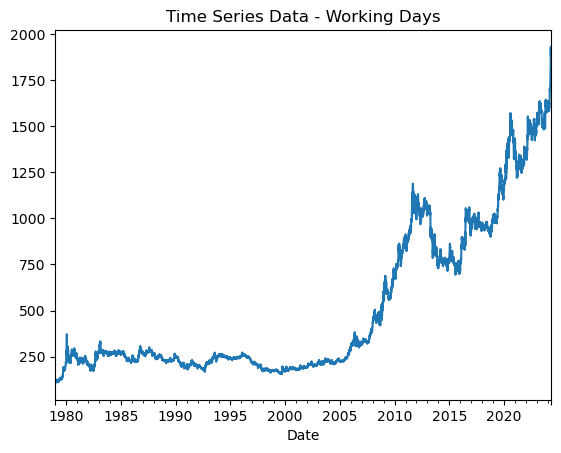

In [3]:
# Set the 'Date' column as the index
df.set_index('Date', inplace=True)

# Resample to ensure daily frequency, filling missing working days
ts = df['GBP'].resample('B').mean()  # 'B' for business day frequency

# Interpolate missing values (if any)
ts = ts.interpolate()

# Plot the time series data
ts.plot(title='Time Series Data - Working Days')
plt.show()

In [4]:
# Split the data into training and test sets
train_size = int(len(ts) * 0.8)  # 80% for training, 20% for testing
train, test = ts.iloc[:train_size], ts.iloc[train_size:]

In [5]:
# Fit the Holt-Winters model on the training data
seasonal_periods = 5  # Weekly seasonality for working days
model = ExponentialSmoothing(train, trend='mul', seasonal='mul', seasonal_periods=seasonal_periods)
fit = model.fit()

C:\Users\Nithya\anaconda3\envs\tf\lib\site-packages\statsmodels\tsa\holtwinters\model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [6]:
# Generate forecasts for the test period
forecast = fit.forecast(steps=len(test))

In [14]:

# Calculate evaluation metrics
mae = mean_absolute_error(test, forecast)
mse = mean_squared_error(test, forecast)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((test - forecast) / test)) * 100
smape = np.mean(2.0 * np.abs(test - forecast) / (np.abs(test) + np.abs(forecast))) * 100
nrmse = rmse / (test.max() - test.min())
nmd = np.mean(test - forecast) / (test.max() - test.min())

mean_price=test.mean()
tss = ((test - mean_price) ** 2).sum()
rss=((test-forecast)**2).sum()
r_squared=1-(rss/tss)
# Mean Absolute Scaled Error (MASE)
# MASE requires a naive forecast (e.g., lagged by one period)
naive_forecast = train.shift(1)
naive_mae = mean_absolute_error(train[1:], naive_forecast[1:])
mase = mae / naive_mae

print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')
print(f'Symmetric Mean Absolute Percentage Error (sMAPE): {smape:.2f}%')
print(f'Mean Absolute Scaled Error (MASE): {mase:.2f}')
print(f'Normalized Root Mean Squared Error (NRMSE): {nrmse:.2f}')
print(f'Normalized Mean Deviation (NMD): {nmd:.2f}')
print(f'R-squared: {r_squared:.4f}')

Mean Absolute Error (MAE): 182.35
Mean Squared Error (MSE): 52476.17
Root Mean Squared Error (RMSE): 229.08
Mean Absolute Percentage Error (MAPE): 13.75%
Symmetric Mean Absolute Percentage Error (sMAPE): 15.07%
Mean Absolute Scaled Error (MASE): 63.73
Normalized Root Mean Squared Error (NRMSE): 0.19
Normalized Mean Deviation (NMD): 0.13
R-squared: 0.3284


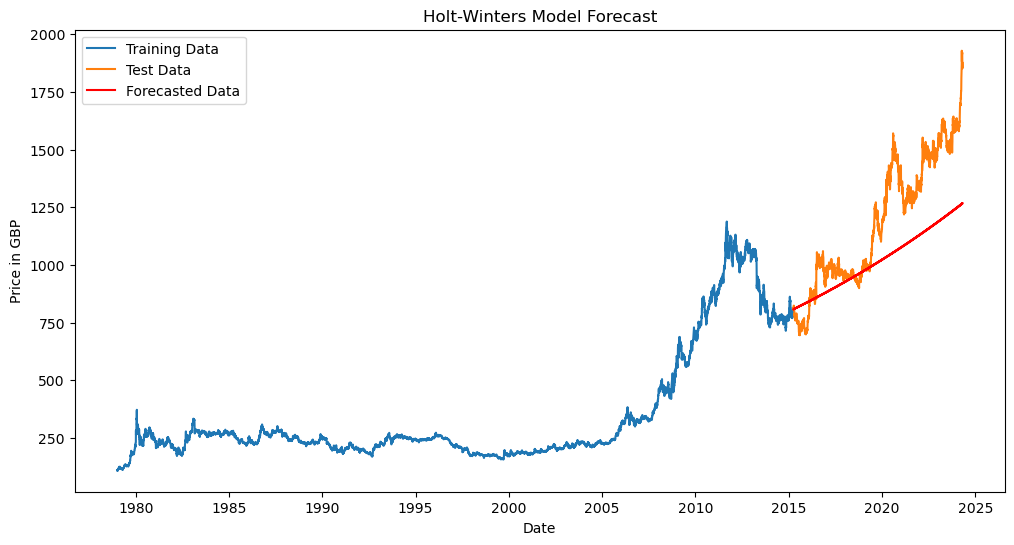

In [15]:
# Plot the actual vs forecasted values
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Training Data')
plt.plot(test.index, test, label='Test Data')
plt.plot(forecast.index, forecast, label='Forecasted Data', color='red')
plt.ylabel("Price in GBP")
plt.xlabel("Date")
plt.legend(loc='best')
plt.title('Holt-Winters Model Forecast')
plt.show()